<a href="https://colab.research.google.com/github/TharaThankachan/Assignment_1_Sep/blob/main/Rain_Fall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
# Load the Dataset
df=pd.read_csv('/content/Weather_ Data.csv')
df.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [ ]:
#Find the number of rows and col jiumns
df.shape

(99516, 23)

In [ ]:
# find the datatypes of features
df.dtypes

row ID            object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow       int64
dtype: object

In [ ]:
# to get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

In [ ]:

#describe the dataset 
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,99073.000000,99286.000000,98537.000000,56985.00000,52199.000000,93036.000000,98581.000000,97681.000000,98283.000000,97010.000000,89768.000000,89780.000000,61944.000000,59514.000000,98902.000000,97612.000000,99516.000000
mean,12.176266,23.218513,2.353024,5.46132,7.615090,39.976966,14.004849,18.650464,68.866376,51.433296,1017.684638,1015.286204,4.447985,4.519122,16.970041,21.681340,0.224677
std,6.390882,7.115072,8.487866,4.16249,3.783008,13.581524,8.902323,8.801827,19.074951,20.777616,7.110166,7.045189,2.886580,2.716618,6.488961,6.931681,0.417372
min,-8.500000,-4.100000,0.000000,0.00000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.000000,-5.100000,0.000000
25%,7.600000,17.900000,0.000000,2.60000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.80000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.40000,10.600000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.400000,0.000000
max,33.900000,48.100000,371.000000,86.20000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000


In [ ]:
#checking columns
df.columns

Index(['row ID', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [14]:
#check null values
df.isna().sum()

row ID               0
Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64

In [ ]:
df['Location'].nunique()

6

In [ ]:
#In this dataset we have 6 uniuque locations 

In [ ]:
df['WindGustDir'].nunique()

16

In [ ]:
# column WindGustDir has 16 unique object type data

In [ ]:
df['WindDir9am'].nunique()

16

In [ ]:
# column WindDir9am has 16 unique object type data

In [ ]:
df['WindDir3pm'].nunique()

16

In [ ]:
# column WindDir3pm has 16 unique object type data

In [ ]:
df['RainToday'].nunique()

2

In [ ]:
# column RainToday has 2 unique object type data

In [ ]:
# Exploratory Data Analysis

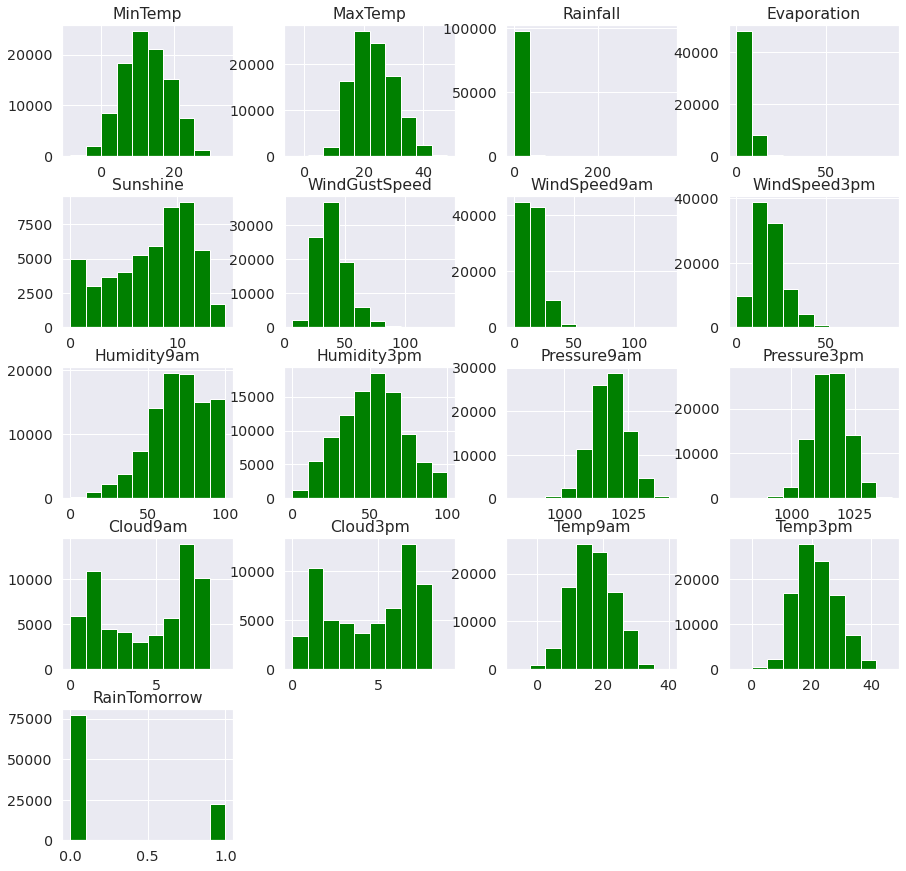

In [ ]:
plt.rcParams['figure.figsize']=15,15
sns.set(style='darkgrid',font_scale=1.3)
ax=df.hist(bins=10,color='green' )

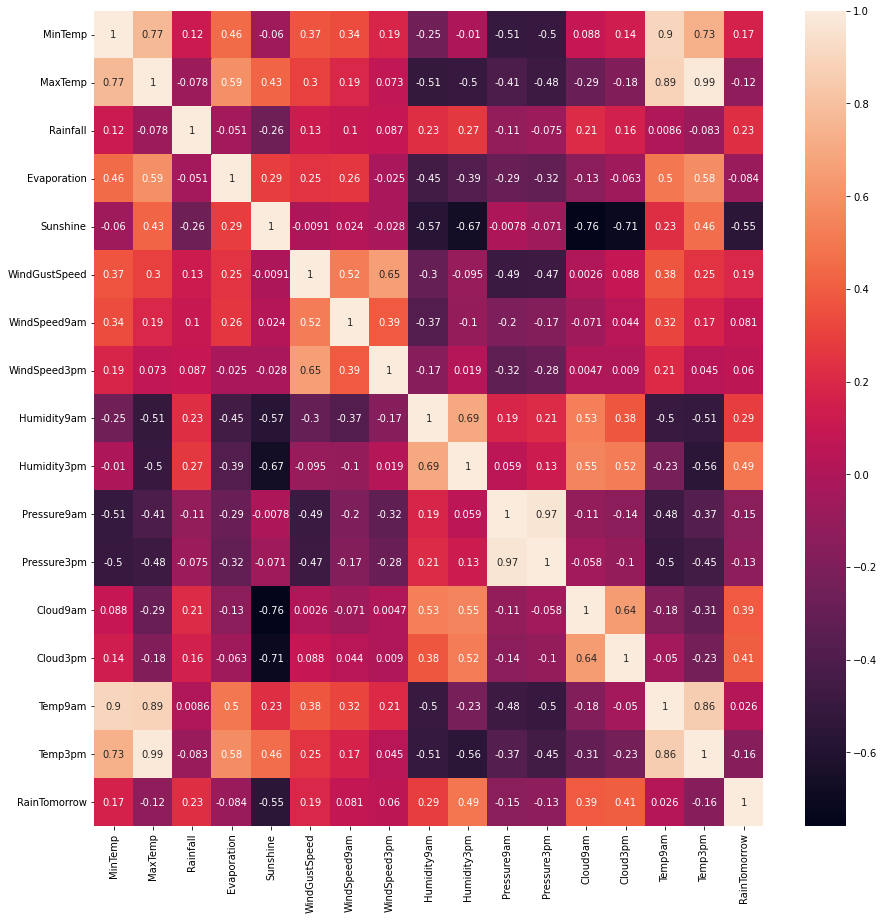

In [ ]:
cm=df.corr()
plt.rcParams['figure.figsize']=15,15
sns.heatmap(cm,annot=True,cbar=True)

In [ ]:
#Interpretation

#From the above correlation heat map, we can conclude that :-

#MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.77).

#MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.73).

#MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.90).

#MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.89).

#MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.99).

#Pressure9am and Pressure3pm variables are strongly positively correlated (correlation coefficient = 0.97).

#Temp9am and Temp3pm variables are strongly positively correlated (correlation coefficient = 0.86).

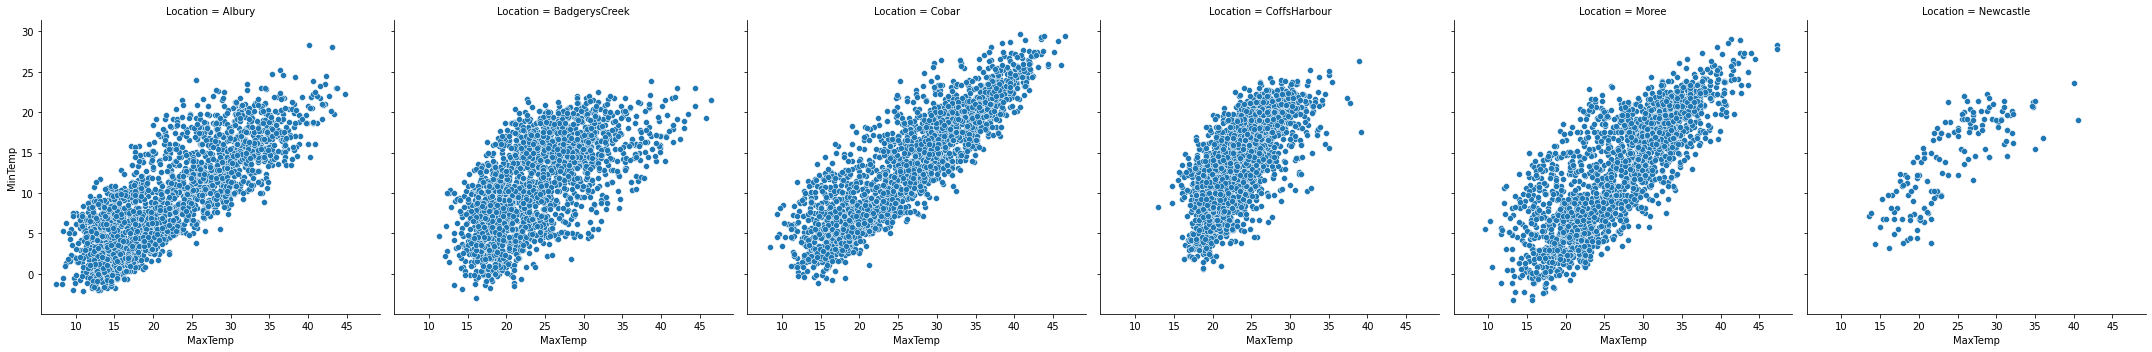

In [ ]:
sns.relplot(x=df['MaxTemp'],y=df['MinTemp'],col=df['Location'])
plt.show()

In [ ]:
# min and max teperature at different locations

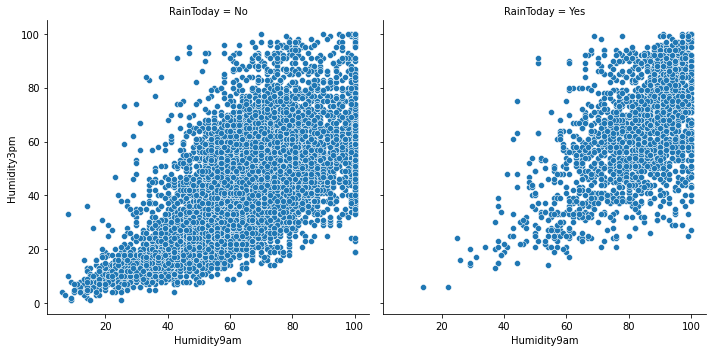

In [ ]:
sns.relplot(x=df['Humidity9am'],y=df['Humidity3pm'],col=df['RainToday'])
plt.show()

In [ ]:
# if  humidity is less ,then chance to rain

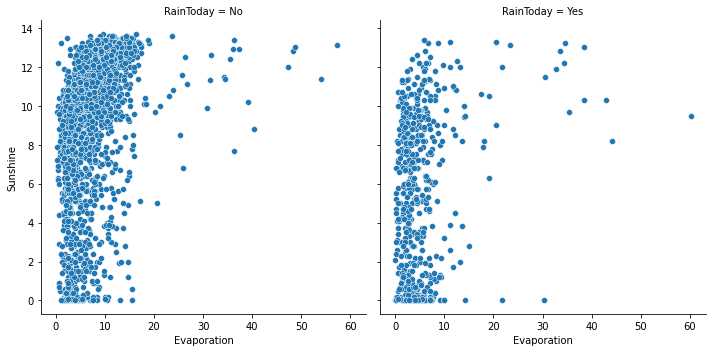

In [ ]:
sns.relplot(x=df['Evaporation'],y=df['Sunshine'],col=df['RainToday'])
plt.show()

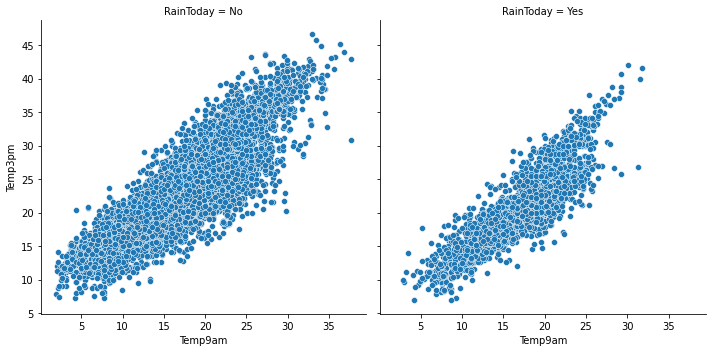

In [ ]:
sns.relplot(x=df['Temp9am'],y=df['Temp3pm'],col=df['RainToday'])
plt.show()


In [ ]:
# If temperature is less then it may chance to rain

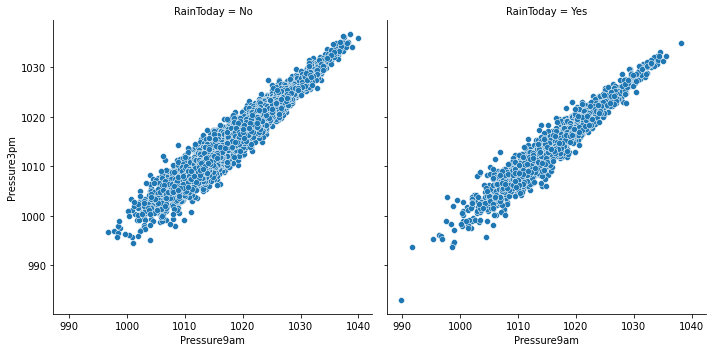

In [ ]:
sns.relplot(x=df['Pressure9am'],y=df['Pressure3pm'],col=df['RainToday'])
plt.show()


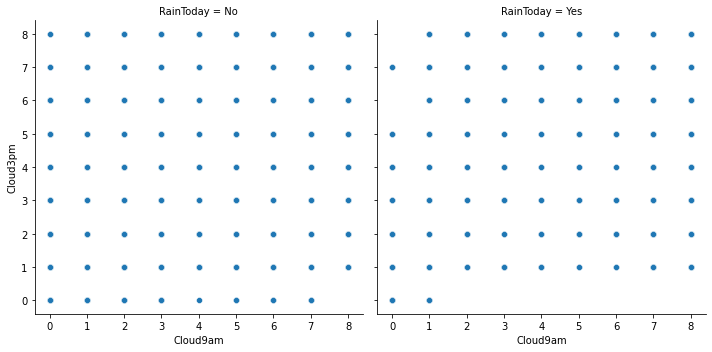

In [ ]:
sns.relplot(x=df['Cloud9am'],y=df['Cloud3pm'],col=df['RainToday'])
plt.show()


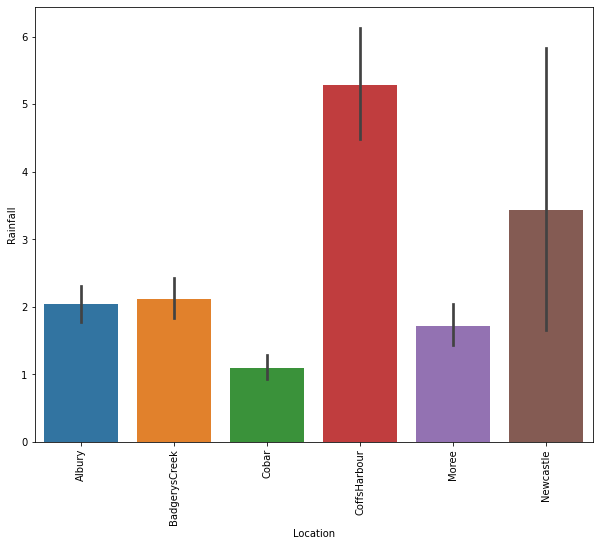

In [ ]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
sns.barplot(data=df,y='Rainfall',x='Location');

In [ ]:
# CoffsHarbour has the Highest Rain fall

In [ ]:
#plotting box plots to idetify the outliers

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Rainfall')

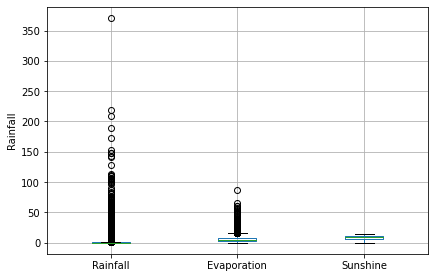

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig=df.boxplot(column=['Rainfall','Evaporation','Sunshine'])
fig.set_title('')
fig.set_ylabel('Rainfall')


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'WindSpeed9am')

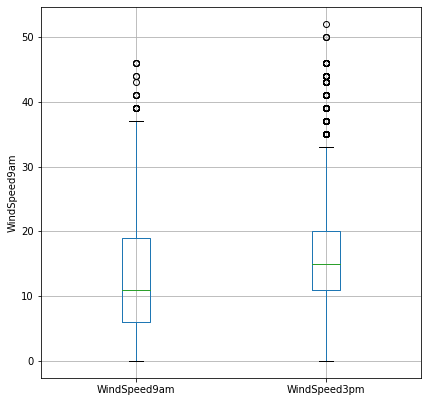

In [ ]:
plt.subplot(2,2,3)
fig=df.boxplot(column=['WindSpeed9am','WindSpeed3pm'])
fig.set_title('')
fig.set_ylabel('WindSpeed9am')



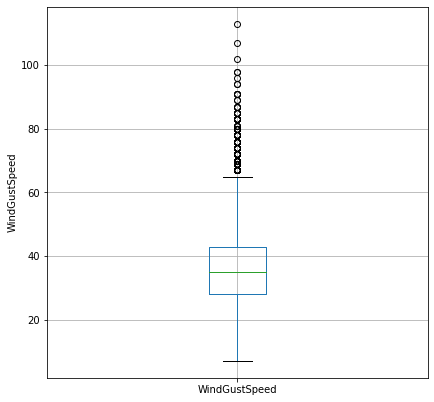

In [ ]:
plt.subplot(2,2,4)
fig=df.boxplot(column=['WindGustSpeed'])
fig.set_title('')
fig.set_ylabel('WindGustSpeed');

In [ ]:
df.columns

Index(['row ID', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.dtypes

row ID            object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow     float64
dtype: object

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, '')

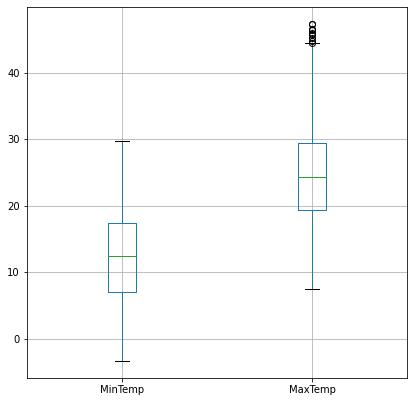

In [ ]:
plt.subplot(2,2,4)
fig=df.boxplot(column=['MinTemp','MaxTemp'])
fig.set_title('')


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, '')

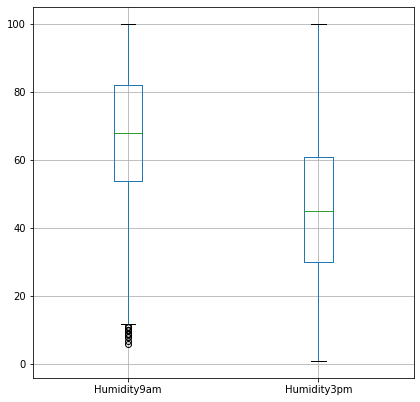

In [ ]:
plt.subplot(2,2,4)
fig=df.boxplot(column=['Humidity9am', 'Humidity3pm'])
fig.set_title('')


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, '')

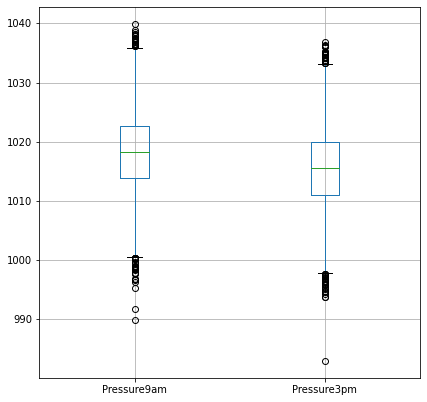

In [ ]:
plt.subplot(2,2,4)
fig=df.boxplot(column=['Pressure9am', 'Pressure3pm'])
fig.set_title('')


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, '')

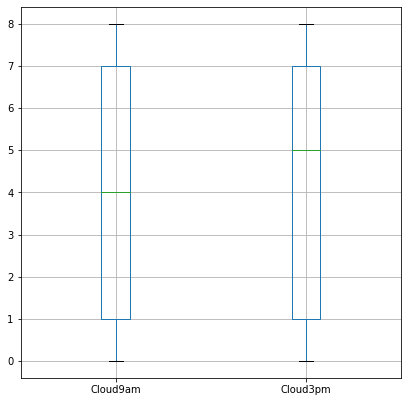

In [ ]:
plt.subplot(2,2,4)
fig=df.boxplot(column=['Cloud9am', 'Cloud3pm'])
fig.set_title('')


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, '')

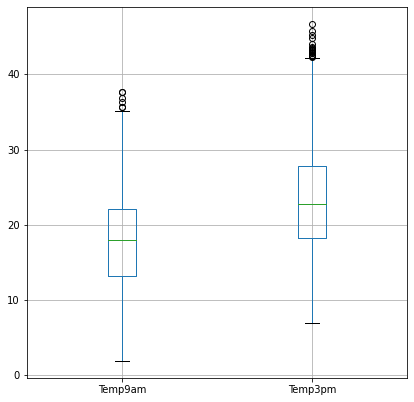

In [ ]:
plt.subplot(2,2,4)
fig=df.boxplot(column=['Temp9am', 'Temp3pm'])
fig.set_title('')


In [ ]:
# from these plots we could identify that some of the features have outleirs

In [ ]:
# Dimentionality reduction 
# AS per the correlation from the heat map we can drop one of the highly correlated column

In [141]:
df1=df.drop(['row ID','Rainfall','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Cloud9am','Temp9am','Evaporation','Sunshine'],axis=1)
df1

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity3pm,Pressure3pm,Cloud3pm,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,W,44.0,W,WNW,22.0,1007.1,NaN,21.8,No,0
1,Albury,7.4,25.1,WNW,44.0,NNW,WSW,25.0,1007.8,NaN,24.3,No,0
2,Albury,17.5,32.3,W,41.0,ENE,NW,33.0,1006.0,8.0,29.7,No,0
3,Albury,14.6,29.7,WNW,56.0,W,W,23.0,1005.4,NaN,28.9,No,0
4,Albury,7.7,26.7,W,35.0,SSE,W,19.0,1010.1,NaN,25.5,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,Uluru,8.0,20.7,ESE,41.0,SE,E,32.0,1024.3,7.0,20.0,No,0
99512,Uluru,3.5,21.8,E,31.0,ESE,E,27.0,1021.2,NaN,20.9,No,0
99513,Uluru,2.8,23.4,E,31.0,SE,ENE,24.0,1020.3,NaN,22.4,No,0
99514,Uluru,3.6,25.3,NNW,22.0,SE,N,21.0,1019.1,NaN,24.5,No,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       99516 non-null  object 
 1   MinTemp        99073 non-null  float64
 2   MaxTemp        99286 non-null  float64
 3   WindGustDir    92995 non-null  object 
 4   WindGustSpeed  93036 non-null  float64
 5   WindDir9am     92510 non-null  object 
 6   WindDir3pm     96868 non-null  object 
 7   Humidity3pm    97010 non-null  float64
 8   Pressure3pm    89780 non-null  float64
 9   Cloud3pm       59514 non-null  float64
 10  Temp3pm        97612 non-null  float64
 11  RainToday      98537 non-null  object 
 12  RainTomorrow   99516 non-null  int64  
dtypes: float64(7), int64(1), object(5)
memory usage: 9.9+ MB


In [16]:
df1.isna().sum()

Location             0
MinTemp            443
MaxTemp            230
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
Humidity3pm       2506
Pressure3pm       9736
Cloud3pm         40002
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64

In [ ]:
# in Cloud3pm 40% of data is missing, thus we can drop the column


In [149]:
df1.drop('Cloud3pm',axis=1,inplace=True)

In [ ]:
df1

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity3pm,Pressure3pm,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,W,44.0,W,WNW,22.0,1007.1,21.8,No,0
1,Albury,7.4,25.1,WNW,44.0,NNW,WSW,25.0,1007.8,24.3,No,0
2,Albury,17.5,32.3,W,41.0,ENE,NW,33.0,1006.0,29.7,No,0
3,Albury,14.6,29.7,WNW,56.0,W,W,23.0,1005.4,28.9,No,0
4,Albury,7.7,26.7,W,35.0,SSE,W,19.0,1010.1,25.5,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99511,Uluru,8.0,20.7,ESE,41.0,SE,E,32.0,1024.3,20.0,No,0
99512,Uluru,3.5,21.8,E,31.0,ESE,E,27.0,1021.2,20.9,No,0
99513,Uluru,2.8,23.4,E,31.0,SE,ENE,24.0,1020.3,22.4,No,0
99514,Uluru,3.6,25.3,NNW,22.0,SE,N,21.0,1019.1,24.5,No,0


In [ ]:
# To fill null values check the sckewness of the data

In [91]:
df1.isna().sum()

Location            0
MinTemp           443
MaxTemp           230
WindGustDir      6521
WindGustSpeed    6480
WindDir9am       7006
WindDir3pm       2648
Humidity3pm      2506
Pressure3pm      9736
Temp3pm          1904
RainToday         979
RainTomorrow        0
dtype: int64

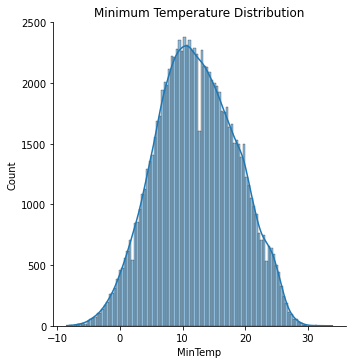

In [ ]:
sns.displot(df1, x="MinTemp", kde=True)
plt.title("Minimum Temperature Distribution")
plt.show()

In [ ]:
# Fill the null values with the median 

In [142]:
df1['MinTemp']=df1['MinTemp'].fillna(df1['MinTemp'].median())

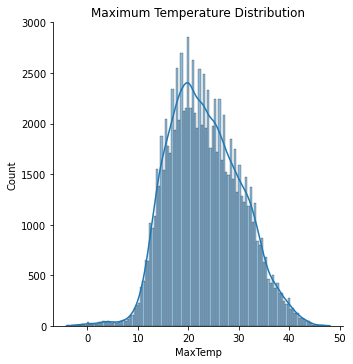

In [ ]:
sns.displot(df1, x="MaxTemp", kde=True)
plt.title("Maximum Temperature Distribution")
plt.show()

In [ ]:
# Fill the null values with the median 

In [143]:
df1['MaxTemp']=df1['MaxTemp'].fillna(df1['MaxTemp'].median())

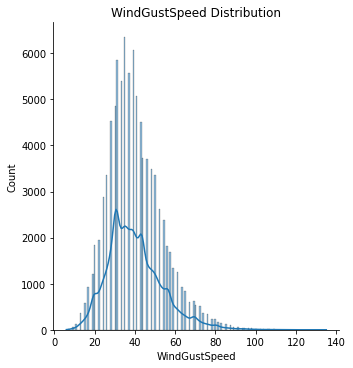

In [ ]:
sns.displot(df1, x="WindGustSpeed", kde=True)
plt.title("WindGustSpeed Distribution")
plt.show()

In [144]:
# Fill the null values with the median 
df1['WindGustSpeed']=df1['WindGustSpeed'].fillna(df1['WindGustSpeed'].median())

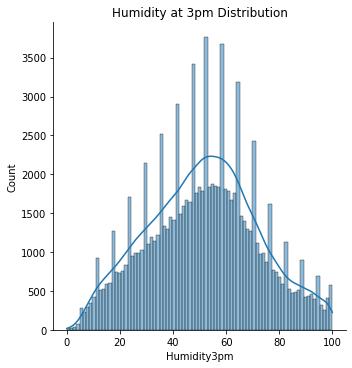

In [ ]:
sns.displot(df1, x="Humidity3pm", kde=True)
plt.title("Humidity at 3pm Distribution")
plt.show()

In [145]:
# Fill the null values with the median
df1['Humidity3pm']=df1['Humidity3pm'].fillna(df1['Humidity3pm'].median())

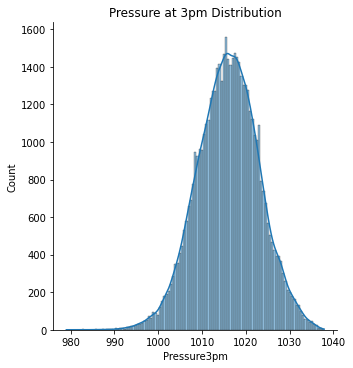

In [8]:
sns.displot(df1, x="Pressure3pm", kde=True)
plt.title("Pressure at 3pm Distribution")
plt.show()

In [146]:
# Fill the null values with the mean
df1['Pressure3pm']=df1['Pressure3pm'].fillna(df1['Pressure3pm'].mean())

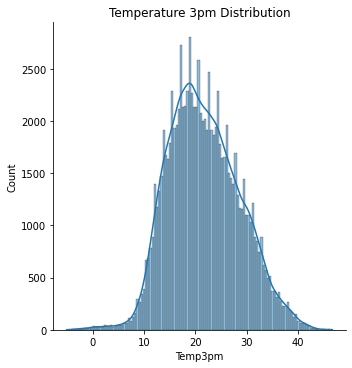

In [ ]:
sns.displot(df1, x="Temp3pm", kde=True)
plt.title("Temperature 3pm Distribution")
plt.show()

In [147]:
# Fill the null values with the median
df1['Temp3pm']=df1['Temp3pm'].fillna(df1['Temp3pm'].median())

In [150]:
df1.isna().sum()

Location            0
MinTemp             0
MaxTemp             0
WindGustDir      6521
WindGustSpeed       0
WindDir9am       7006
WindDir3pm       2648
Humidity3pm         0
Pressure3pm         0
Temp3pm             0
RainToday         979
RainTomorrow        0
dtype: int64

In [ ]:
df1.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
Humidity3pm      float64
Pressure3pm      float64
Cloud3pm         float64
Temp3pm          float64
RainToday         object
RainTomorrow       int64
dtype: object

In [151]:
# Fill the categorical columns with mode
df1['WindGustDir']=df1['WindGustDir'].fillna(df1['WindGustDir'].mode()[0])
df1['WindDir9am']=df1['WindDir9am'].fillna(df1['WindDir9am'].mode()[0])
df1['WindDir3pm']=df1['WindDir3pm'].fillna(df1['WindDir3pm'].mode()[0])

In [152]:
df1.isna().sum()

Location           0
MinTemp            0
MaxTemp            0
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
Humidity3pm        0
Pressure3pm        0
Temp3pm            0
RainToday        979
RainTomorrow       0
dtype: int64

In [ ]:
# Column 'Raintoday' has 979 null values if we fill this with any other values, it may mislead our prediction so drop the null values 

In [153]:
df1= df1.dropna(subset=['RainToday'])

In [29]:
df1.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
Humidity3pm      0
Pressure3pm      0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
#Handling outliers


In [ ]:
#df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])

In [ ]:
#forward filling
#df2['Temp3pm']=df2['Temp3pm'].ffill()
# can use forward and backward fill if you have a time series data

In [ ]:
df1.head()

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity3pm,Pressure3pm,Cloud3pm,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,W,44.0,W,WNW,22.0,1007.1,5.0,21.8,No,0
1,Albury,7.4,25.1,WNW,44.0,NNW,WSW,25.0,1007.8,5.0,24.3,No,0
2,Albury,17.5,32.3,W,41.0,ENE,NW,33.0,1006.0,8.0,29.7,No,0
3,Albury,14.6,29.7,WNW,56.0,W,W,23.0,1005.4,5.0,28.9,No,0
4,Albury,7.7,26.7,W,35.0,SSE,W,19.0,1010.1,5.0,25.5,No,0


In [ ]:
df['Humidity3pm'].nunique()

101

In [ ]:
df['Humidity3pm'].unique()

array([ 22.,  25.,  33.,  23.,  19.,  27.,  91.,  43.,  28.,  82.,  65.,
        32.,  26.,  24.,  17.,  15.,  70.,  12.,  16.,  20.,  21.,  10.,
        13.,  11.,   9.,   8.,  30.,  18.,  39.,  14.,  35.,  90.,  68.,
        74.,  34.,  78.,  49.,  37.,  42.,  47.,  29.,  86.,  89.,  62.,
        79.,  48.,  46.,  38.,  51.,  44.,  36.,  45.,  40.,  53.,  61.,
        63.,  57.,  58.,  75.,  80.,  95.,  56.,  72.,  60.,  52.,  71.,
        81.,  76.,  69.,  73.,  64.,  59.,  87.,  85.,  67.,  54.,  55.,
        77.,  50.,  84.,  31.,   7.,  93.,  41.,  92.,  66.,  83.,  94.,
        96.,  nan, 100.,  88.,  98.,  99.,  97.,   5.,   6.,   1.,   4.,
         2.,   3.,   0.])

In [154]:
 #In the column Humidity3pm, there is 0% Humidity. That is impossible,that can be replace with 1%
df1['Humidity3pm']=df1['Humidity3pm'].replace([0],1)

<ipython-input-154-927d2ebd36c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Humidity3pm']=df1['Humidity3pm'].replace([0],1)


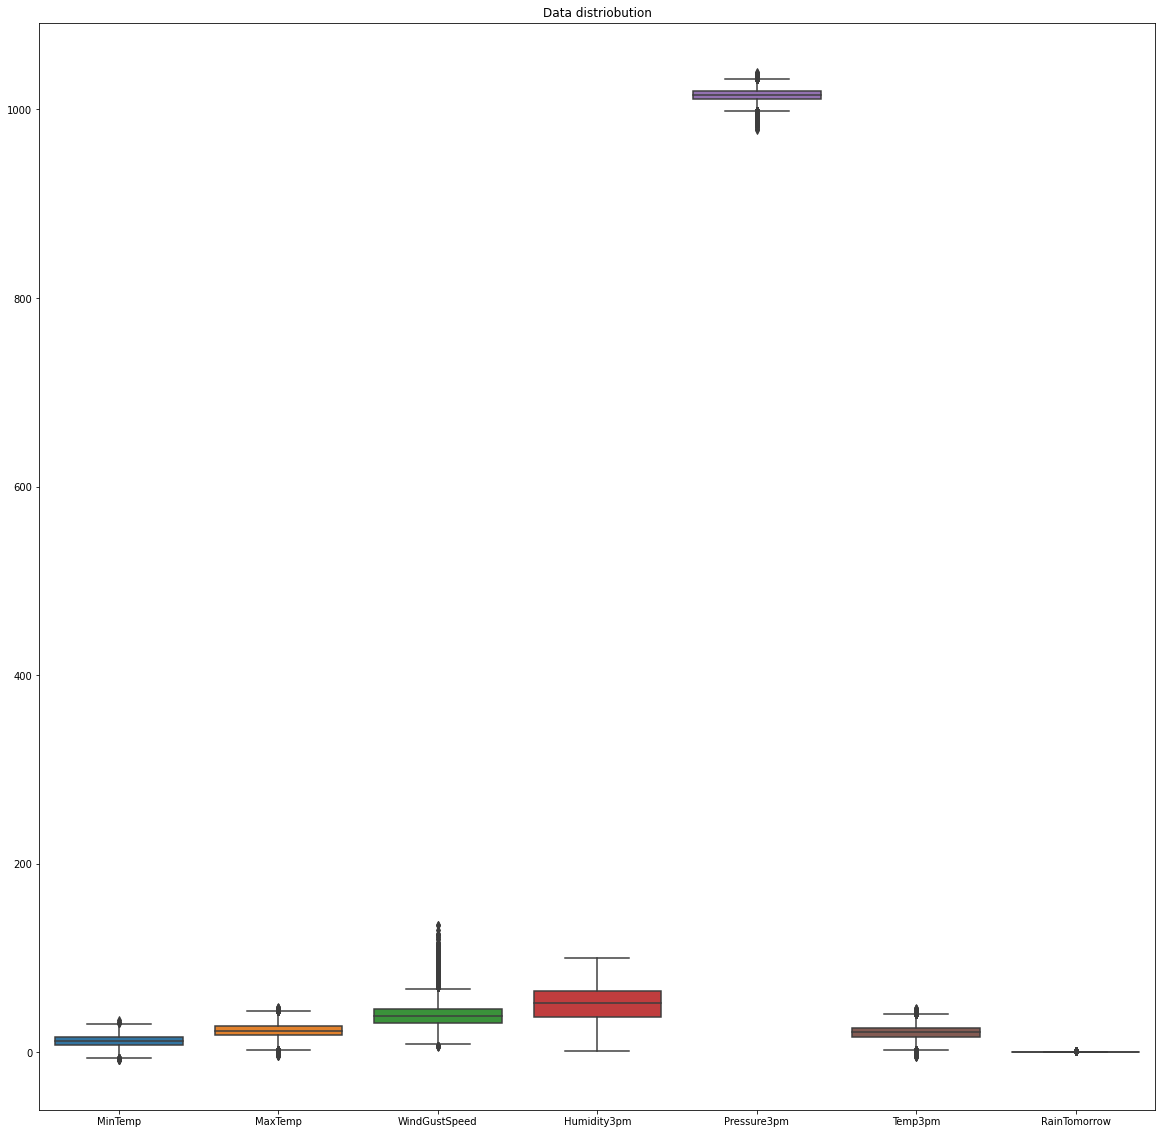

In [ ]:
#Handling outliers
#plot boxplots of non categorical columns
plt.rcParams['figure.figsize']=20,20
sns.boxplot(data=df1)
plt.title('Data distriobution')
plt.show()

In [ ]:
# MinTemp,MaxTemp,WindGustSpeed,Pressure3pm,Temp3pm have outliers

In [155]:
# detecting outliers of MinTemp
Q1_MinTemp=df1['MinTemp'].quantile(0.25)
Q3_MinTemp=df1['MinTemp'].quantile(0.75)



In [156]:
IQR_MinTemp=Q3_MinTemp-Q1_MinTemp


In [157]:
MinTemp_lower=Q1_MinTemp-1.5* IQR_MinTemp
MinTemp_upper=Q3_MinTemp+1.5* IQR_MinTemp
print(MinTemp_lower)
print(MinTemp_upper)

-6.200000000000001
30.6


In [158]:
MinTemp_out=[]
for x in df1['MinTemp']:
  if(x>MinTemp_upper)|(x<MinTemp_lower):
    MinTemp_out.append(x)
print(MinTemp_out)

[-6.9, -6.5, -6.3, -8.0, -6.7, -6.6, -6.8, -7.0, -6.9, -7.0, -6.7, -7.0, -6.3, -6.7, -8.5, -6.3, -7.1, -6.4, -6.5, -6.5, -6.6, -6.5, -6.3, -6.7, -7.6, -6.6, -7.5, -6.4, -6.4, -6.7, -6.5, -8.2, -7.2, -6.5, -7.8, -7.0, -7.3, -7.0, 31.9, 33.9, 30.7, 31.4, 31.4, 31.2]


In [159]:
#Fill the outliers with upper limit and lower limit
df1.loc[df1['MinTemp']>=MinTemp_upper,'MinTemp']=MinTemp_upper
df1.loc[df1['MinTemp']<=MinTemp_lower,'MinTemp']=MinTemp_lower

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


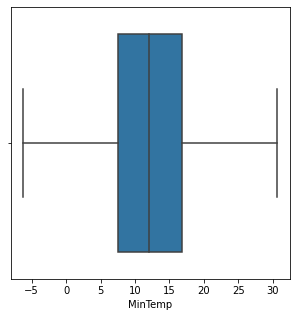

In [36]:
plt.rcParams['figure.figsize']=5,5
sns.boxplot(df1['MinTemp'])

In [160]:
# detecting outliers of MaxTemp
Q1_MaxTemp=df1['MaxTemp'].quantile(0.25)
Q3_MaxTemp=df1['MaxTemp'].quantile(0.75)


In [161]:
IQR_MaxTemp=Q3_MaxTemp-Q1_MaxTemp

In [162]:
MaxTemp_lower=Q1_MaxTemp-1.5* IQR_MaxTemp
MaxTemp_upper=Q3_MaxTemp+1.5* IQR_MaxTemp
print(MaxTemp_lower)
print(MaxTemp_upper)

2.4499999999999975
43.65


In [163]:
MaxTemp_out=[]
for x in df1['MaxTemp']:
  if(x>MaxTemp_upper)|(x<MaxTemp_lower):
    MaxTemp_out.append(x)
print(MaxTemp_out)

[44.8, 43.7, 45.8, 44.4, 44.4, 46.4, 44.3, 43.7, 46.0, 43.8, 44.3, 45.2, 45.7, 46.6, 47.3, 43.9, 44.5, 47.3, 44.1, 44.0, 46.5, 44.9, 43.9, 45.1, 46.9, 46.4, 45.3, 44.5, 44.4, 43.8, 45.8, 44.1, 45.5, -1.7, 0.0, 0.0, 2.4, 2.3, 0.1, -0.1, -2.2, -0.6, 0.6, 2.2, 0.4, -0.7, -1.8, -0.2, 0.1, 0.1, -0.6, -0.6, 1.6, 0.3, 1.2, 1.0, 0.5, 0.2, 2.4, 0.9, -0.3, 0.6, -2.5, 2.1, 1.4, 1.8, 1.0, 2.1, -1.0, 2.1, 0.5, 1.6, -2.0, -1.3, 1.7, -0.9, -1.5, -3.1, 0.9, 0.1, 0.3, 1.0, 2.1, -0.6, 1.7, 1.1, -2.1, 1.4, -1.5, -1.2, -2.0, -0.1, -1.1, -1.5, 1.7, 0.2, -0.3, 1.5, 0.0, 0.9, 1.7, 0.3, 0.6, 0.1, 2.2, 1.8, 2.3, 0.0, -1.0, 0.3, 0.8, 2.2, 2.1, 1.6, 1.3, 1.3, -1.5, -1.5, -1.1, 0.5, 1.4, 2.4, 1.2, 2.3, 1.8, 1.1, 0.6, -2.2, 2.3, -0.6, -3.7, -2.9, 0.3, -0.8, 0.5, 0.1, -0.4, 2.1, 1.7, -3.8, 0.0, 1.6, 0.9, -0.9, -1.7, -1.9, 0.9, -0.5, 1.2, -2.1, -0.3, 0.7, 1.3, 0.8, -0.3, -4.1, -1.4, 1.4, -0.7, 1.7, 2.3, 2.2, 1.0, -1.3, 1.5, 2.2, 0.8, 2.4, 1.0, -1.4, -0.2, -0.7, 0.0, -0.2, 2.4, 1.6, -0.2, -0.2, -3.2, 0.0, 2.2, -1.4, 

In [164]:
#Fill the outliers with upper limit and lower limit
df1.loc[df1['MaxTemp']>=MaxTemp_upper,'MaxTemp']=MaxTemp_upper
df1.loc[df1['MaxTemp']<=MaxTemp_lower,'MaxTemp']=MaxTemp_lower

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


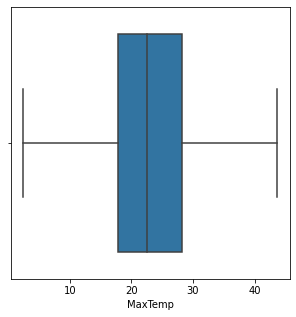

In [113]:
sns.boxplot(df1['MaxTemp'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


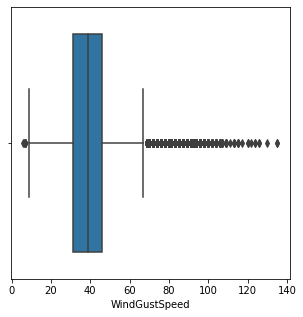

In [ ]:
# detecting outliers of WindGustSpeed
sns.boxplot(df1['WindGustSpeed'])



In [165]:
Q1_WindGustSpeed=df1['WindGustSpeed'].quantile(0.25)
Q3_WindGustSpeed=df1['WindGustSpeed'].quantile(0.75)


In [166]:
IQR_WindGustSpeed=Q3_WindGustSpeed-Q1_WindGustSpeed

In [167]:
WindGustSpeed_lower=Q1_WindGustSpeed-1.5* IQR_WindGustSpeed
WindGustSpeed_upper=Q3_WindGustSpeed+1.5* IQR_WindGustSpeed
print(WindGustSpeed_lower)
print(WindGustSpeed_upper)

8.5
68.5


In [168]:
WindGustSpeed_out=[]
for x in df1['WindGustSpeed']:
  if(x>WindGustSpeed_upper)|(x<WindGustSpeed_lower):
    WindGustSpeed_out.append(x)
print(WindGustSpeed_out)


[83.0, 70.0, 69.0, 98.0, 70.0, 72.0, 85.0, 78.0, 78.0, 107.0, 74.0, 69.0, 94.0, 70.0, 69.0, 76.0, 69.0, 83.0, 78.0, 69.0, 87.0, 83.0, 81.0, 78.0, 72.0, 69.0, 70.0, 70.0, 72.0, 80.0, 69.0, 76.0, 72.0, 72.0, 85.0, 72.0, 69.0, 69.0, 72.0, 81.0, 80.0, 76.0, 70.0, 83.0, 83.0, 74.0, 70.0, 69.0, 76.0, 69.0, 72.0, 80.0, 72.0, 74.0, 70.0, 85.0, 70.0, 69.0, 78.0, 70.0, 76.0, 80.0, 7.0, 89.0, 80.0, 72.0, 91.0, 83.0, 78.0, 69.0, 69.0, 80.0, 72.0, 70.0, 81.0, 102.0, 74.0, 69.0, 72.0, 94.0, 72.0, 69.0, 72.0, 85.0, 78.0, 69.0, 72.0, 72.0, 69.0, 69.0, 72.0, 69.0, 74.0, 78.0, 83.0, 74.0, 70.0, 69.0, 72.0, 87.0, 69.0, 69.0, 70.0, 69.0, 74.0, 98.0, 76.0, 72.0, 69.0, 76.0, 76.0, 69.0, 70.0, 69.0, 81.0, 70.0, 83.0, 69.0, 76.0, 70.0, 91.0, 72.0, 113.0, 83.0, 72.0, 91.0, 70.0, 69.0, 69.0, 76.0, 69.0, 70.0, 91.0, 69.0, 74.0, 74.0, 74.0, 69.0, 69.0, 70.0, 72.0, 74.0, 76.0, 87.0, 70.0, 76.0, 83.0, 74.0, 85.0, 70.0, 80.0, 69.0, 72.0, 72.0, 72.0, 72.0, 70.0, 78.0, 70.0, 96.0, 85.0, 74.0, 72.0, 69.0, 76.0, 72.0, 6

In [169]:
#Fill the outliers with upper limit and lower limit
df1.loc[df1['WindGustSpeed']>=WindGustSpeed_upper,'WindGustSpeed']=WindGustSpeed_upper
df1.loc[df1['WindGustSpeed']<=WindGustSpeed_lower,'WindGustSpeed']=WindGustSpeed_lower

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


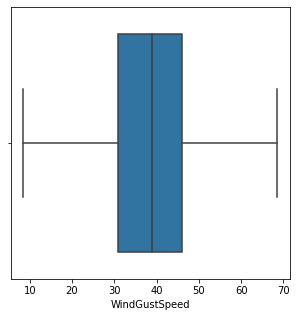

In [ ]:
sns.boxplot(df1['WindGustSpeed'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


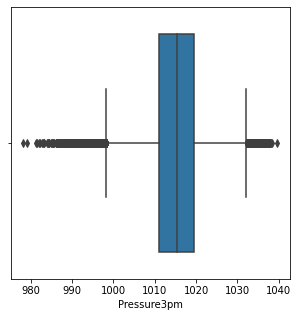

In [ ]:
# detecting outliers of Pressure3pm
sns.boxplot(df1['Pressure3pm'])

In [170]:
Q1_Pressure3pm=df1['Pressure3pm'].quantile(0.25)
Q3_Pressure3pm=df1['Pressure3pm'].quantile(0.75)


In [171]:
IQR_Pressure3pm=Q3_Pressure3pm-Q1_Pressure3pm

In [172]:
Pressure3pm_lower=Q1_Pressure3pm-1.5* IQR_Pressure3pm
Pressure3pm_upper=Q3_Pressure3pm+1.5* IQR_Pressure3pm
print(Pressure3pm_lower)
print(Pressure3pm_upper)

998.25
1032.25


In [173]:
Pressure3pm_out=[]
for x in df1['Pressure3pm']:
  if(x>Pressure3pm_upper)|(x<Pressure3pm_lower):
       Pressure3pm_out.append(x)
print(Pressure3pm_out)


[997.6, 1033.6, 1033.8, 1035.2, 1034.1, 982.9, 994.3, 1032.6, 1035.1, 1034.2, 1033.3, 1034.6, 1036.0, 996.2, 995.4, 995.7, 1032.5, 1033.2, 1032.9, 997.2, 1033.3, 994.8, 1032.6, 1032.3, 1032.8, 996.9, 1034.2, 1032.8, 1036.1, 1035.2, 998.1, 995.9, 1034.3, 1033.7, 1032.4, 998.0, 998.2, 1034.9, 1033.2, 1034.9, 1033.2, 1032.7, 995.1, 1032.8, 1036.4, 1035.0, 1032.5, 1034.8, 1036.8, 997.6, 1032.5, 997.7, 1033.6, 997.9, 995.3, 997.6, 1034.3, 1035.2, 997.9, 994.5, 993.8, 997.4, 996.5, 996.7, 1033.3, 1032.8, 1033.2, 1032.5, 995.8, 995.8, 996.2, 993.7, 1032.3, 996.9, 998.1, 996.4, 997.1, 995.9, 998.1, 998.2, 1034.0, 1033.7, 991.6, 997.4, 1032.4, 1035.1, 1034.4, 996.5, 1032.3, 996.2, 995.7, 1032.3, 1034.1, 1032.5, 1032.5, 1035.6, 995.5, 998.2, 1034.5, 995.8, 995.6, 994.9, 995.5, 996.8, 996.1, 979.0, 998.0, 996.0, 997.2, 997.1, 998.2, 998.1, 996.7, 997.2, 1032.5, 1035.7, 1033.0, 989.0, 1032.9, 1036.3, 1034.5, 1036.8, 997.6, 997.7, 1033.7, 996.9, 998.2, 997.8, 1033.3, 1034.4, 1033.4, 1035.5, 997.1, 

In [174]:
#Fill the outliers with upper limit and lower limit
df1.loc[df1['Pressure3pm']>=Pressure3pm_upper,'Pressure3pm']=Pressure3pm_upper
df1.loc[df1['Pressure3pm']<=Pressure3pm_lower,'Pressure3pm']=Pressure3pm_lower

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


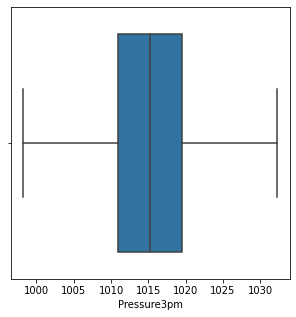

In [ ]:
sns.boxplot(df1['Pressure3pm'])

In [ ]:
# detecting outliers of Temp3pm


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


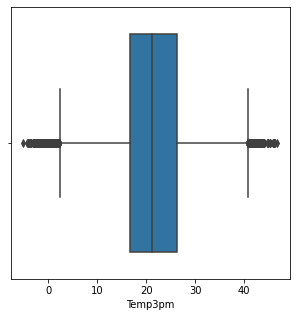

In [ ]:
sns.boxplot(df1['Temp3pm'])

In [175]:
Q1_Temp3pm=df1['Temp3pm'].quantile(0.25)
Q3_Temp3pm=df1['Temp3pm'].quantile(0.75)


In [176]:
IQR_Temp3pm=Q3_Temp3pm-Q1_Temp3pm

In [177]:
Temp3pm_lower=Q1_Temp3pm-1.5* IQR_Temp3pm
Temp3pm_upper=Q3_Temp3pm+1.5* IQR_Temp3pm
print(Temp3pm_lower)
print(Temp3pm_upper)

2.299999999999997
40.7


In [178]:
Temp3pm_out=[]
for x in df1['Temp3pm']:
  if(x>Temp3pm_upper)|(x<Temp3pm_lower):
       Temp3pm_out.append(x)
print(Temp3pm_out)


[42.0, 41.9, 41.6, 43.4, 40.9, 41.1, 42.4, 41.7, 42.3, 42.4, 41.5, 42.2, 40.9, 43.7, 41.1, 43.5, 43.3, 43.0, 41.4, 40.8, 41.4, 43.2, 41.9, 44.8, 42.9, 42.6, 40.9, 41.1, 43.1, 41.5, 41.5, 41.5, 44.0, 40.8, 42.0, 41.6, 42.1, 45.2, 40.8, 40.9, 41.1, 42.1, 42.4, 45.8, 41.4, 41.3, 41.2, 41.6, 42.8, 46.7, 41.4, 42.4, 43.5, 42.2, 41.0, 41.1, 45.3, 44.1, 41.1, 42.5, 46.2, 41.0, 41.7, 45.9, 43.5, 42.7, 41.7, 40.9, 44.7, 41.7, 41.3, 42.3, 40.8, 41.0, 42.0, 41.8, 40.9, 41.4, 43.0, 42.0, 41.0, 41.5, 42.4, 41.8, 41.4, 41.0, 43.9, -1.9, -1.3, 1.4, 0.8, 1.8, -0.3, -0.3, -2.9, -5.1, -0.4, 0.9, 2.1, 1.2, -0.6, -1.0, -1.8, -1.0, -0.1, -0.2, 1.3, -1.0, -1.2, -0.6, -0.1, -0.3, 2.0, 0.8, 1.3, 0.3, -0.2, 2.0, 1.3, 1.3, 0.0, 2.0, 2.0, -1.6, 0.2, 0.4, -3.1, 1.1, 1.0, -0.1, 0.6, 1.2, -1.7, 1.3, 0.7, 0.9, -1.4, 0.6, 2.0, -2.3, -2.0, 0.3, 0.0, -1.1, -0.3, -2.2, -3.7, 1.2, -1.1, 0.9, 1.5, -1.3, -0.5, 1.2, -0.7, 0.9, 2.2, -0.5, -2.7, 0.2, -2.1, -3.5, -1.9, -2.3, 0.9, -1.2, 0.5, -1.2, -1.3, -1.7, -0.3, 1.2, 1.6, 1.

In [179]:
#Fill the outliers with upper limit and lower limit
df1.loc[df1['Temp3pm']>=Temp3pm_upper,'Temp3pm']=Temp3pm_upper
df1.loc[df1['Temp3pm']<=Temp3pm_lower,'Temp3pm']=Temp3pm_lower

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


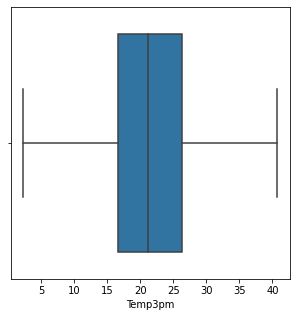

In [ ]:
sns.boxplot(df1['Temp3pm'])

In [180]:
# encode the categorical columns - Location,WindGustDir,WindDir3pm and RainToday
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
df1['Location']=le.fit_transform(df1['Location'])
df1['WindGustDir']=le.fit_transform(df1['WindGustDir'])
df1['WindDir9am']=le.fit_transform(df1['WindDir9am'])
df1['WindDir3pm']=le.fit_transform(df1['WindDir3pm'])
df1['RainToday']=le.fit_transform(df1['RainToday'])

In [59]:
df1

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity3pm,Pressure3pm,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,13,44.0,13,14,22.0,1007.1,21.8,0,0
1,2,7.4,25.1,14,44.0,6,15,25.0,1007.8,24.3,0,0
2,2,17.5,32.3,13,41.0,1,7,33.0,1006.0,29.7,0,0
3,2,14.6,29.7,14,56.0,13,13,23.0,1005.4,28.9,0,0
4,2,7.7,26.7,13,35.0,10,13,19.0,1010.1,25.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99511,41,8.0,20.7,2,41.0,9,0,32.0,1024.3,20.0,0,0
99512,41,3.5,21.8,0,31.0,2,0,27.0,1021.2,20.9,0,0
99513,41,2.8,23.4,0,31.0,9,1,24.0,1020.3,22.4,0,0
99514,41,3.6,25.3,6,22.0,9,3,21.0,1019.1,24.5,0,0


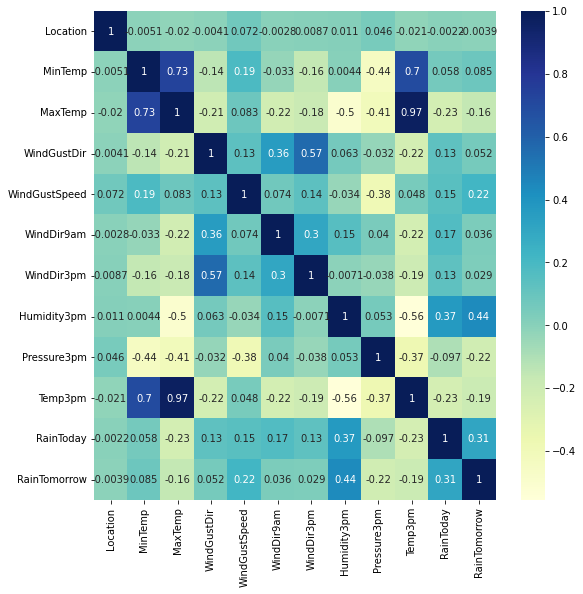

In [ ]:
cm1=df1.corr()
plt.rcParams['figure.figsize']=9,9
sns.heatmap(cm1,annot=True,cmap='YlGnBu', cbar=True)


In [ ]:
#MaxTemp and temp3pm highly corelated, we can drop temp3pm


In [ ]:
df1.drop('Temp3pm',axis=1,inplace=True)

In [61]:
df1.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
Humidity3pm      0
Pressure3pm      0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
# select target and features

In [132]:
y=df1['RainTomorrow']
X=df1.drop('RainTomorrow',axis=1)

In [133]:
X

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity3pm,Pressure3pm,RainToday
0,2,13.4,22.9,13,44.0,13,14,22.0,1007.1,0
1,2,7.4,25.1,14,44.0,6,15,25.0,1007.8,0
2,2,17.5,32.3,13,41.0,1,7,33.0,1006.0,0
3,2,14.6,29.7,14,56.0,13,13,23.0,1005.4,0
4,2,7.7,26.7,13,35.0,10,13,19.0,1010.1,0
...,...,...,...,...,...,...,...,...,...,...
99511,41,8.0,20.7,2,41.0,9,0,32.0,1024.3,0
99512,41,3.5,21.8,0,31.0,2,0,27.0,1021.2,0
99513,41,2.8,23.4,0,31.0,9,1,24.0,1020.3,0
99514,41,3.6,25.3,6,22.0,9,3,21.0,1019.1,0


In [64]:
#Standard Scaling 
from sklearn.preprocessing import StandardScaler
std_scl=StandardScaler()

In [65]:
X1=X.drop(['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday'],axis=1)


In [ ]:
X1

,MinTemp,MaxTemp,WindGustSpeed,Humidity3pm,Pressure3pm
0,13.4,22.9,44.0,22.0,1007.1
1,7.4,25.1,44.0,25.0,1007.8
2,17.5,32.3,41.0,33.0,1006.0
3,14.6,29.7,56.0,23.0,1005.4
4,7.7,26.7,35.0,19.0,1010.1
...,...,...,...,...,...
99511,8.0,20.7,41.0,32.0,1024.3
99512,3.5,21.8,31.0,27.0,1021.2
99513,2.8,23.4,31.0,24.0,1020.3
99514,3.6,25.3,22.0,21.0,1019.1


In [66]:
X1=std_scl.fit_transform(X1)
X1


array([[ 0.19231349, -0.04628523,  0.36117782, -1.43309427, -1.24830337],
       [-0.74834918,  0.2641754 ,  0.36117782, -1.28693736, -1.1417816 ],
       [ 0.83509965,  1.28022837,  0.11536766, -0.8971856 , -1.41569473],
       ...,
       [-1.46952389,  0.024274  , -0.70399957, -1.33565633,  0.76039292],
       [-1.3441022 ,  0.29239909, -1.44143007, -1.48181324,  0.57778417],
       [-1.0619034 ,  0.51818864, -0.21237923, -1.33565633,  0.22778405]])

In [67]:
X1=pd.DataFrame(X1,columns=['MinTemp','MaxTemp','WindGustSpeed','Humidity3pm','Pressure3pm'])
X1

,MinTemp,MaxTemp,WindGustSpeed,Humidity3pm,Pressure3pm
0,0.192313,-0.046285,0.361178,-1.433094,-1.248303
1,-0.748349,0.264175,0.361178,-1.286937,-1.141782
2,0.835100,1.280228,0.115368,-0.897186,-1.415695
3,0.380446,0.913320,1.344418,-1.384375,-1.506999
4,-0.701316,0.489965,-0.376253,-1.579251,-0.791781
...,...,...,...,...,...
98532,-0.654283,-0.356746,0.115368,-0.945905,1.369089
98533,-1.359780,-0.201516,-0.704000,-1.189499,0.897349
98534,-1.469524,0.024274,-0.704000,-1.335656,0.760393
98535,-1.344102,0.292399,-1.441430,-1.481813,0.577784


In [68]:
X.drop(['MinTemp','MaxTemp','WindGustSpeed','Humidity3pm','Pressure3pm'],axis=1,inplace=True)


In [ ]:
X

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,2,13,13,14,0
1,2,14,6,15,0
2,2,13,1,7,0
3,2,14,13,13,0
4,2,13,10,13,0
...,...,...,...,...,...
99511,41,2,9,0,0
99512,41,0,2,0,0
99513,41,0,9,1,0
99514,41,6,9,3,0


In [ ]:
X1

,MinTemp,MaxTemp,WindGustSpeed,Humidity3pm,Pressure3pm
0,0.192313,-0.046285,0.361178,-1.433094,-1.248303
1,-0.748349,0.264175,0.361178,-1.286937,-1.141782
2,0.835100,1.280228,0.115368,-0.897186,-1.415695
3,0.380446,0.913320,1.344418,-1.384375,-1.506999
4,-0.701316,0.489965,-0.376253,-1.579251,-0.791781
...,...,...,...,...,...
98532,-0.654283,-0.356746,0.115368,-0.945905,1.369089
98533,-1.359780,-0.201516,-0.704000,-1.189499,0.897349
98534,-1.469524,0.024274,-0.704000,-1.335656,0.760393
98535,-1.344102,0.292399,-1.441430,-1.481813,0.577784


In [69]:
X.index=X1.index

In [70]:
X=pd.concat([X,X1],axis=1)

In [ ]:
X

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,MinTemp,MaxTemp,WindGustSpeed,Humidity3pm,Pressure3pm
0,2,13,13,14,0,0.192313,-0.046285,0.361178,-1.433094,-1.248303
1,2,14,6,15,0,-0.748349,0.264175,0.361178,-1.286937,-1.141782
2,2,13,1,7,0,0.835100,1.280228,0.115368,-0.897186,-1.415695
3,2,14,13,13,0,0.380446,0.913320,1.344418,-1.384375,-1.506999
4,2,13,10,13,0,-0.701316,0.489965,-0.376253,-1.579251,-0.791781
...,...,...,...,...,...,...,...,...,...,...
98532,41,2,9,0,0,-0.654283,-0.356746,0.115368,-0.945905,1.369089
98533,41,0,2,0,0,-1.359780,-0.201516,-0.704000,-1.189499,0.897349
98534,41,0,9,1,0,-1.469524,0.024274,-0.704000,-1.335656,0.760393
98535,41,6,9,3,0,-1.344102,0.292399,-1.441430,-1.481813,0.577784


# **Models-1**

In [ ]:
# import train split test from sklearn

In [71]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)


In [ ]:
# 1) Logistic Regression

In [72]:
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_model=lr.fit(X_train,y_train)
lr_y_predict=lr_model.predict(X_test)

In [74]:
confusion_matrix(y_test,lr_y_predict)

array([[14480,   820],
       [ 2362,  2046]])

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,lr_y_predict)

0.8385427237669981

In [76]:
f1_score(y_test,lr_y_predict)

0.5625515534781413

In [ ]:
# 2) Support Virtual Machine

In [77]:
from sklearn.svm import SVC
svm_clf=SVC(kernel='linear')

In [78]:
svm_clf=svm_clf.fit(X_train,y_train)
y_pre=svm_clf.predict(X_test)

In [79]:
confusion_matrix(y_test,y_pre)

array([[14613,   687],
       [ 2498,  1910]])

In [80]:
accuracy_score(y_test,y_pre)

0.8383905013192612

In [ ]:
# 3)KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

In [ ]:

kNN_m=[]
neighbors=range(3,15)
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k)
  classifier=classifier.fit(X_train,y_train)
  kNN_y_predi=classifier.predict(X_test)
  acc=accuracy_score(y_test,kNN_y_predi)
  kNN_m.append(acc)
  

In [ ]:
print(kNN_m)

[0.8263141871321291, 0.8344327176781002, 0.8339760503348894, 0.8385934645829105, 0.8379338339760504, 0.8409275421148772, 0.8409782829307896, 0.8419423584331236, 0.8428049523036331, 0.8419930992490359, 0.8411305053785265, 0.8422975441445099]


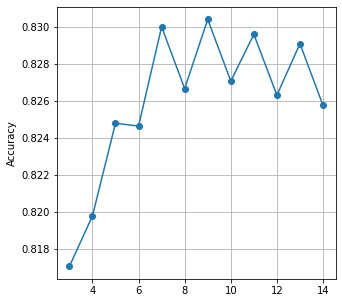

In [ ]:
plt.plot(neighbors, kNN_m,'o-')
plt.xlabel=('K values')
plt.ylabel('Accuracy')
plt.grid()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=11)
classifier = classifier.fit(X_train,y_train)
kNN_y_predi=classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test,kNN_y_predi)

array([[14776,   524],
       [ 2834,  1574]])

In [ ]:

accuracy_score(y_test,kNN_y_predi)

0.8296123401664299

In [ ]:

f1_score(y_test,kNN_y_predi)


0.4838610513372272

In [ ]:
#4)Decision tree Classifier

In [ ]:
y=df1['RainTomorrow']
x=df1.drop('RainTomorrow',axis=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [ ]:
dt=dt.fit(x_train,y_train)
y_predt=dt.predict(x_test)
print("Confusion matrix :",confusion_matrix(y_test,y_predt))
print("Accuracy :",accuracy_score(y_test,y_predt))
print("f1 score :",f1_score(y_test,y_predt))

Confusion matrix : [[13019  2281]
 [ 2103  2305]]
Accuracy : 0.7775522630403897
f1 score : 0.5125639315098955


In [ ]:
#5)Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [ ]:
rfc=rfc.fit(x_train,y_train)
y_pred_fc=rfc.predict(x_test)
print(confusion_matrix(y_test,y_pred_fc))
print("Accuracy :",accuracy_score(y_test,y_pred_fc))
print("f1 score:",f1_score(y_test,y_pred_fc))

[[14568   732]
 [ 2201  2207]]
Accuracy : 0.8511771869291658
f1 score: 0.6007894378657954


# **Models-2**

In [ ]:
# create a new column AvgTemp with the average of MinTemp and	MaxTemp

In [134]:
df1

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity3pm,Pressure3pm,RainToday,RainTomorrow
0,2,13.4,22.9,13,44.0,13,14,22.0,1007.1,0,0
1,2,7.4,25.1,14,44.0,6,15,25.0,1007.8,0,0
2,2,17.5,32.3,13,41.0,1,7,33.0,1006.0,0,0
3,2,14.6,29.7,14,56.0,13,13,23.0,1005.4,0,0
4,2,7.7,26.7,13,35.0,10,13,19.0,1010.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99511,41,8.0,20.7,2,41.0,9,0,32.0,1024.3,0,0
99512,41,3.5,21.8,0,31.0,2,0,27.0,1021.2,0,0
99513,41,2.8,23.4,0,31.0,9,1,24.0,1020.3,0,0
99514,41,3.6,25.3,6,22.0,9,3,21.0,1019.1,0,0


In [182]:
AvgTemp=(df1['MaxTemp']+df1['MinTemp'])/2

In [183]:
df1.insert(2,'AvgTemp',AvgTemp,True)


In [184]:
df1

,Location,MinTemp,AvgTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity3pm,Pressure3pm,Temp3pm,RainToday,RainTomorrow
0,2,13.4,18.15,22.9,13,44.0,13,14,22.0,1007.1,21.8,0,0
1,2,7.4,16.25,25.1,14,44.0,6,15,25.0,1007.8,24.3,0,0
2,2,17.5,24.90,32.3,13,41.0,1,7,33.0,1006.0,29.7,0,0
3,2,14.6,22.15,29.7,14,56.0,13,13,23.0,1005.4,28.9,0,0
4,2,7.7,17.20,26.7,13,35.0,10,13,19.0,1010.1,25.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,41,8.0,14.35,20.7,2,41.0,9,0,32.0,1024.3,20.0,0,0
99512,41,3.5,12.65,21.8,0,31.0,2,0,27.0,1021.2,20.9,0,0
99513,41,2.8,13.10,23.4,0,31.0,9,1,24.0,1020.3,22.4,0,0
99514,41,3.6,14.45,25.3,6,22.0,9,3,21.0,1019.1,24.5,0,0


In [185]:
df2=df1.drop(['MinTemp','MaxTemp'],axis=1)

In [186]:
df2

,Location,AvgTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity3pm,Pressure3pm,Temp3pm,RainToday,RainTomorrow
0,2,18.15,13,44.0,13,14,22.0,1007.1,21.8,0,0
1,2,16.25,14,44.0,6,15,25.0,1007.8,24.3,0,0
2,2,24.90,13,41.0,1,7,33.0,1006.0,29.7,0,0
3,2,22.15,14,56.0,13,13,23.0,1005.4,28.9,0,0
4,2,17.20,13,35.0,10,13,19.0,1010.1,25.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99511,41,14.35,2,41.0,9,0,32.0,1024.3,20.0,0,0
99512,41,12.65,0,31.0,2,0,27.0,1021.2,20.9,0,0
99513,41,13.10,0,31.0,9,1,24.0,1020.3,22.4,0,0
99514,41,14.45,6,22.0,9,3,21.0,1019.1,24.5,0,0


In [187]:
df2.isna().sum()

Location         0
AvgTemp          0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
Humidity3pm      0
Pressure3pm      0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
#Random Forest classifier

In [188]:
y=df1['RainTomorrow']
X=df1.drop('RainTomorrow',axis=1)

In [189]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)


In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
Rfc=RandomForestClassifier()
Rfc=Rfc.fit(X_train,y_train)
y_pred_rfc=Rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred_rfc))
print("Accuracy :",accuracy_score(y_test,y_pred_rfc))
print("f1 score:",f1_score(y_test,y_pred_rfc))


[[14582   718]
 [ 2255  2153]]
Accuracy : 0.8491475542926731
f1 score: 0.5915647753812338


In [ ]:
# hyper parameter tunning using RandomizedSearch

In [192]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [193]:
parameters={'n_estimators':[50,100,150,250],'max_depth':[3,6,9,None]}

In [194]:
random_model=RandomizedSearchCV(RandomForestClassifier(),parameters,scoring='f1')
random_model.fit(X_train,y_train)
print(random_model.best_params_)

{'n_estimators': 250, 'max_depth': None}


In [195]:
model_random=RandomForestClassifier(n_estimators=250,max_depth=None)
model1=model_random.fit(X_train,y_train)
y_pred_random=model1.predict(X_test)

In [196]:
print('Accuracy',accuracy_score(y_pred_random,y_test))
print('f1 score',f1_score(y_pred_random,y_test))

Accuracy 0.8509234828496042
f1 score 0.5976444809641195


In [ ]:
# hyper parameter tunning using GridSearch

In [197]:
cv=GridSearchCV(RandomForestClassifier(),parameters,scoring='f1')
cv.fit(X_train,y_train)
print(cv.best_params_)

{'max_depth': None, 'n_estimators': 250}


In [198]:
model_grid=RandomForestClassifier(n_estimators=250,max_depth=None)
model1=model_grid.fit(X_train,y_train)
y_pred_grid=model1.predict(X_test)


In [199]:
print('Accuracy',accuracy_score(y_pred_grid,y_test))
print('f1 score',f1_score(y_pred_grid,y_test))

Accuracy 0.8513294093769028
f1 score 0.5993984140005468


In [ ]:
# Dropping the column MinTemp and keeping MaxTemp 

## Models-**3**

In [200]:
df1

,Location,MinTemp,AvgTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity3pm,Pressure3pm,Temp3pm,RainToday,RainTomorrow
0,2,13.4,18.15,22.9,13,44.0,13,14,22.0,1007.1,21.8,0,0
1,2,7.4,16.25,25.1,14,44.0,6,15,25.0,1007.8,24.3,0,0
2,2,17.5,24.90,32.3,13,41.0,1,7,33.0,1006.0,29.7,0,0
3,2,14.6,22.15,29.7,14,56.0,13,13,23.0,1005.4,28.9,0,0
4,2,7.7,17.20,26.7,13,35.0,10,13,19.0,1010.1,25.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,41,8.0,14.35,20.7,2,41.0,9,0,32.0,1024.3,20.0,0,0
99512,41,3.5,12.65,21.8,0,31.0,2,0,27.0,1021.2,20.9,0,0
99513,41,2.8,13.10,23.4,0,31.0,9,1,24.0,1020.3,22.4,0,0
99514,41,3.6,14.45,25.3,6,22.0,9,3,21.0,1019.1,24.5,0,0


In [203]:
df3=df1.drop(['MinTemp','AvgTemp','Temp3pm'],axis=1)

In [204]:
df3

,Location,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity3pm,Pressure3pm,RainToday,RainTomorrow
0,2,22.9,13,44.0,13,14,22.0,1007.1,0,0
1,2,25.1,14,44.0,6,15,25.0,1007.8,0,0
2,2,32.3,13,41.0,1,7,33.0,1006.0,0,0
3,2,29.7,14,56.0,13,13,23.0,1005.4,0,0
4,2,26.7,13,35.0,10,13,19.0,1010.1,0,0
...,...,...,...,...,...,...,...,...,...,...
99511,41,20.7,2,41.0,9,0,32.0,1024.3,0,0
99512,41,21.8,0,31.0,2,0,27.0,1021.2,0,0
99513,41,23.4,0,31.0,9,1,24.0,1020.3,0,0
99514,41,25.3,6,22.0,9,3,21.0,1019.1,0,0


In [205]:
y=df1['RainTomorrow']
X=df1.drop('RainTomorrow',axis=1)

In [206]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)


In [207]:
Rfc=RandomForestClassifier()
Rfc=Rfc.fit(X_train,y_train)
y_pred_rfc=Rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred_rfc))
print("Accuracy :",accuracy_score(y_test,y_pred_rfc))
print("f1 score:",f1_score(y_test,y_pred_rfc))


[[14587   713]
 [ 2237  2171]]
Accuracy : 0.8503145930586564
f1 score: 0.595447065277016


In [ ]:
# hyper parameter tunning using RandomizedSearch

In [210]:
cv=GridSearchCV(RandomForestClassifier(),parameters,scoring='f1')
cv.fit(X_train,y_train)
print(cv.best_params_)

{'max_depth': None, 'n_estimators': 250}


In [211]:
model_random=RandomForestClassifier(n_estimators=250,max_depth=None)
model1=model_random.fit(X_train,y_train)
y_pred_random=model1.predict(X_test)

In [212]:
print('Accuracy',accuracy_score(y_pred_random,y_test))
print('f1 score',f1_score(y_pred_random,y_test))

Accuracy 0.8520397807996752
f1 score 0.601312551271534


In [213]:
model_grid=RandomForestClassifier(n_estimators=250,max_depth=None)
model1=model_grid.fit(X_train,y_train)
y_pred_grid=model1.predict(X_test)
print('Accuracy',accuracy_score(y_pred_grid,y_test))
print('f1 score',f1_score(y_pred_grid,y_test))


Accuracy 0.8510249644814288
f1 score 0.5986878075451066
